In [1]:
!pip3 install fastbook
import fastbook
fastbook.setup_book()
import os
os.environ["OMP_NUM_THREADS"] = "1" 

In [2]:
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path

In [8]:
path = Path('/Users/Leah/plantdisease/tomato')
leafs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))

In [9]:
dls = leafs.dataloaders(path)

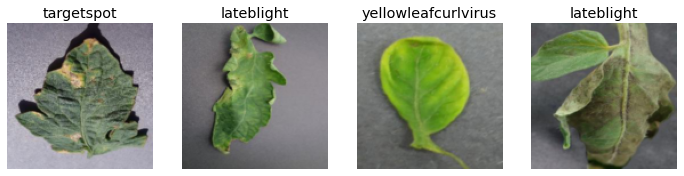

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

In [11]:
leafs = leafs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = leafs.dataloaders(path)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.375610,0.551562,0.156339,26:53
1,0.189652,0.528235,0.138147,26:48
2,0.109492,0.357715,0.097783,29:08
3,0.083302,0.335121,0.088687,44:48


In [13]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.091518,0.367960,0.093235,27:27
1,0.092000,0.397591,0.098351,28:04
2,0.056604,0.280452,0.077317,32:10
3,0.039872,0.226500,0.065378,32:37


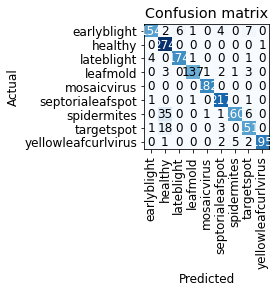

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
learn.export('tomato.pkl')

In [16]:
path = Path()
learn_inf = load_learner(path/'tomato.pkl')